In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
img_size = (96, 96)  
batch_size = 32
classes = 43

In [3]:
class_labels = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of Speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No overtaking",
    10: "No overtaking for trucks",
    11: "Priority at next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no overtaking",
    42: "End of no overtaking for trucks"
}

In [4]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(*img_size, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
base_model.trainable = False

In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(classes, activation="softmax")(x)

In [7]:
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/gtsrb-german-traffic-sign/Train',  
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)


Found 39209 images belonging to 43 classes.


In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // batch_size,
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733112872.453092      97 service.cc:145] XLA service 0x7bde00011550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733112872.453149      97 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733112872.453153      97 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   1/1225 ━━━━━━━━━━━━━━━━━━━━ 4:00:26 12s/step - accuracy: 0.0000e+00 - loss: 4.7038

I0000 00:00:1733112878.011636      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1225/1225 ━━━━━━━━━━━━━━━━━━━━ 279s 219ms/step - accuracy: 0.3769 - loss: 2.2043
Epoch 2/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.5938 - loss: 1.3275 
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1225/1225 ━━━━━━━━━━━━━━━━━━━━ 132s 107ms/step - accuracy: 0.5692 - loss: 1.3034
Epoch 4/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.5938 - loss: 1.1135  
Epoch 5/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 133s 108ms/step - accuracy: 0.6170 - loss: 1.1513
Epoch 6/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.6562 - loss: 1.0192  
Epoch 7/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 133s 108ms/step - accuracy: 0.6386 - loss: 1.0841
Epoch 8/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.6562 - loss: 1.0401  
Epoch 9/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 131s 106ms/step - accuracy: 0.6511 - loss: 1.0454
Epoch 10/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.6875 - loss: 0.9513  


In [12]:
base_model.trainable = True
fine_tune_at = 100  
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 6,997,827 (26.69 MB)

 Trainable params: 2,200,427 (8.39 MB)

 Non-trainable params: 396,544 (1.51 MB)

 Optimizer params: 4,400,856 (16.79 MB)

In [14]:
history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=train_generator.samples // batch_size,
)

Epoch 1/5
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 158s 113ms/step - accuracy: 0.5849 - loss: 1.3844
Epoch 2/5
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.8750 - loss: 0.3769 
Epoch 3/5
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 133s 108ms/step - accuracy: 0.7783 - loss: 0.6540
Epoch 4/5
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.6875 - loss: 0.7272 
Epoch 5/5
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 132s 107ms/step - accuracy: 0.8486 - loss: 0.4563


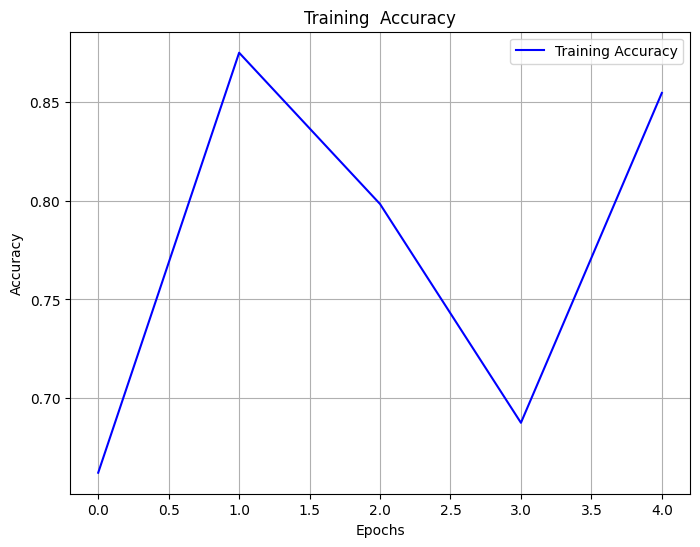

In [29]:
def plot_accuracy(history_fine_tune):
    train_acc = history_fine_tune.history['accuracy']
    val_acc = history_fine_tune.history.get('val_accuracy', None)  
    plt.figure(figsize=(8, 6))
    plt.plot(train_acc, label="Training Accuracy", color="blue")
    
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training  Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy(history_fine_tune)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


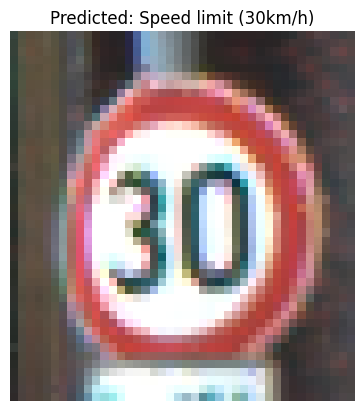

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_resized = cv2.resize(img_rgb, img_size)
    img_resized = np.expand_dims(img_resized, axis=0)
    img_resized = img_resized / 255.0

    pred = model.predict(img_resized)
    predicted_class = np.argmax(pred, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    plt.imshow(img_rgb)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

image_path = "/kaggle/input/gtsrb-german-traffic-sign/Test/00001.png"
predict_image(image_path)
